In [24]:
import pandas as pd
import polars as pl
import numpy as np
import panel as pn
pn.extension('tabulator')

import hvplot.pandas

In [169]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import imageio
import ipywidgets

In [27]:
pl_udemy = pl.read_parquet(r"C:\Users\ornal\Desktop\Data Analitics\Test\udemy.parquet")
pd_udemy = pl_udemy.to_pandas()

In [173]:
pl_coursera = pl.read_parquet(r"C:\Users\ornal\Desktop\Data Analitics\Test\coursera.parquet")
pd_coursera = pl_coursera.to_pandas()

In [97]:
pl_edx = pl.read_csv(r"C:\Users\ornal\Desktop\Data Analitics\Test\edx.csv")
pd_edx = pl_edx.to_pandas()

In [40]:
plu_group_year = (
  pl.read_csv(r"C:\Users\ornal\Desktop\Data Analitics\Test\udemy.csv", parse_dates=True)
  .with_column(pl.col('published_timestamp').cast(pl.Datetime).dt.year().alias('year'))  
  .groupby('year')
  .agg(
  [
    pl.col('price').count().alias('cantidad_cursos')
  ]
  )
  .sort('year')  
)
plu_group_year

year,cantidad_cursos
i32,u32
2011,5
2012,45
2013,202
2014,491
2015,1014
2016,1206
2017,715


In [42]:
pdu_group_year = plu_group_year.to_pandas()

In [43]:
ipdu_group_year = pdu_group_year.interactive()

In [46]:
u_year_pipeline = (
    ipdu_group_year
    #.to_frame()
    .reset_index()
    .sort_values('year')
    .reset_index(drop=True)
)

In [48]:
year_plot = u_year_pipeline.hvplot('year','cantidad_cursos')
year_plot

## Etiquetas

### Precio Promedio

In [93]:
def precio_promedio():
    precio_promedio_edx = pl_edx.select(pl.col('price').mean())
    precio_promedio_udemy = pl_udemy.select(pl.col('price').mean())
    precio_promedio = round( (precio_promedio_edx['price'][0] + precio_promedio_udemy['price'][0])/2  )
    return '#'+str(precio_promedio)

### Tiempo duracion Promedio

In [107]:
def tiempo_duracion():
    tiempo_duracion_edx = pl_edx.select(pl.col('horas').mean())
    tiempo_duracion_udemy = pl_udemy.select(pl.col('num_lectures').mean())
    tiempo_duracion = round( (tiempo_duracion_edx['horas'][0] + tiempo_duracion_udemy['num_lectures'][0])/2  )
    return '#'+str(tiempo_duracion)+'H'

### Idioma mas usado

In [141]:
def idioma():
    serie_idioma = pl_edx.to_pandas()['language'].value_counts()
    pd_idioma = pd.DataFrame(serie_idioma)
    pd_idioma = pd_idioma.reset_index()
    pd_idioma = pd_idioma.rename(columns={'language':'cantidad'})
    pd_idioma = pd_idioma.rename(columns={'index':'language'})
    return '#'+pd_idioma.iloc[0]['language']

In [ ]:

#lista_udemy = lst()

## WordCloud

In [155]:
class MyClass: 
	def __init__(self, val): 
		self.val = val 

(-0.5, 399.5, 199.5, -0.5)

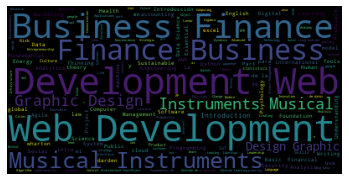

In [175]:
wordcloud = WordCloud().generate(pd_edx['title'].to_string() + ' ' + pd_udemy['subject'].to_string() + ' ' + pd_coursera['course_id'].to_string())
wordcloud.to_file(r"C:\Users\ornal\Desktop\Data Analitics\Test\wordcloud.png")
plt.imshow(wordcloud)
plt.axis('off')

## Imagen

In [179]:
png = pn.panel('wordcloud.png', width=300)

## Sidebar

Column
    [0] PNG(str, width=300)
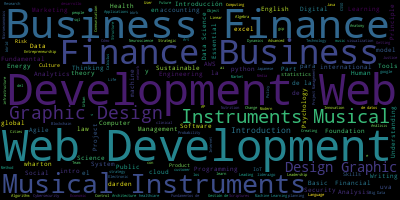

In [180]:
column_sidebar = pn.Column(png)
#column.append('\n')
column_sidebar

In [181]:
template = pn.template.FastListTemplate(
    title='Análisis del Mercado de Cursos Online',
    sidebar=[column_sidebar],
    main=[
        pn.Row(
            pn.Column(precio_promedio(),'#### Precio Promedio'),
            pn.Column('  '),
            pn.Column('#Python','#### tema más Usado'),
            pn.Column('  '),
            pn.Column(idioma(),'#### idioma más Usado'),
            pn.Column('  '),
            pn.Column(tiempo_duracion(),'#### Duración Promedio')
        ),
        pn.Row(pn.Column('# Ventas por año (fuentes: Udemy)',year_plot))
    ]
)

template.servable();
template.show()

Launching server at http://localhost:59295
